First step is to find a gaussian fit for the data. This fit will have to be shifted up with a constant B, to count for the background data. It will give the number of events that are in the peak

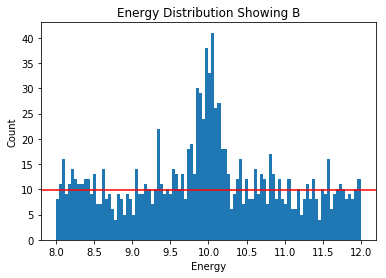

In [21]:
#Imports
import numpy as np
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

#Load in the data - May want to add try/catch block
data = np.loadtxt('../data/data_for_testing_00.dat',)
#Load Columns
day = data[:,0]
energy = data[:,1]
riseTime = data[:,2]

plt.hist(energy, bins =100)

#Isolated the background data to find mean. This mean will be the B constant in the gaussian fit 
background = np.array([])
for i in energy:
    if(i<9.5 or i>10.5):
        background = np.append(background, [i])
    
B = np.mean(background)
plt.axhline(y=B, color='r', linestyle='-')
plt.title("Energy Distribution Showing B")
plt.ylabel("Count")
plt.xlabel("Energy")
plt.show()

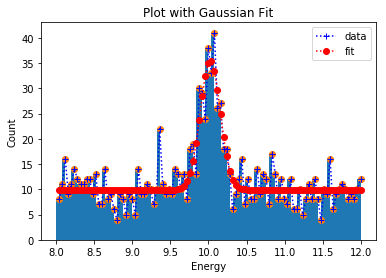

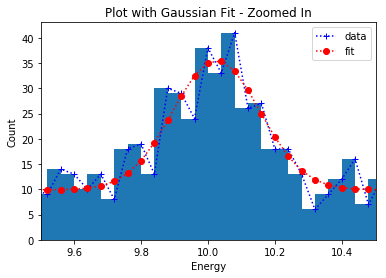

Gaussian information:
      G(x) =  25.644321*exp(-(x-10.024029)**2/(2*0.130274**2)) + 9.904660
       Where the Amplitude = 25.644321
       Where the Mean = 10.024029
       Where the Standard Deviation = 0.130274
       Where the Constant B = 9.904660


In [15]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

y, x, _ = plt.hist(energy,bins=100)

x = x[1:] 

n = len(energy)                     #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

plt.plot(x, y, 'o')

def gaus(x,a,x0,sigma, B):
    return a*exp(-(x-x0)**2/(2*sigma**2)) + B

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma, B])
yGauss = gaus(x,*popt)

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title("Plot with Gaussian Fit")
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()

plt.hist(energy,bins=100)
plt.plot(x,y,'b+:',label='data')
plt.plot(x,yGauss,'ro:',label='fit')
plt.legend()
plt.title("Plot with Gaussian Fit - Zoomed In")
plt.xlabel('Energy')
plt.ylabel('Count')
plt.xlim([9.5, 10.5])
plt.show()

print("Gaussian information:")
print("      G(x) =  %f*exp(-(x-%f)**2/(2*%f**2)) + %f" %(popt[0], popt[1], popt[2], popt[3]))
print("       Where the Amplitude = %f" %popt[0])
print("       Where the Mean = %f" %popt[1])
print("       Where the Standard Deviation = %f" %popt[2])
print("       Where the Constant B = %f" %popt[3])

The desired value is the area under the curve of the Gaussian. This is the total number of events observed. There are two possible ways to obtain this; Count the bins that are within the curve, Integrate the  Guassian from the beginning of the peak to the end

In [26]:
#Adding the bins - as simple as looping through the events from 9.5 to 10.5, adding them, and subtracting the background
Sum = 0

for i in energy:
    if(i>9.5 and i<10.5):
        Sum = Sum + i - B
        
print("The summation of the bins in the peak is %f" %Sum)

#Using the quad method from the scipy.integrate class, 
#the previosuly defined gaus function can be passed in and the integral is solved

I = quad(gaus, 9.5, 10.5, args=(popt[0], popt[1], popt[2], popt[3]))

print("The integral of the peak is %f" %I[0])

The summation of the bins in the peak is 16.467388
The integral of the peak is 18.277458
